# Tema 1 ML - Paunoiu Darius Alexandru

In [241]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df is your DataFrame after loading the CSV
statistics_df = pd.read_csv("date_tema_1_iaut_2024.csv")
pd.set_option('display.max_columns', None)

RANDOM_STATES = [42, 10, 15, 21, 13, 30, 35, 37, 45, 53]
RANDOM_STATE = RANDOM_STATES[0]
# List of categorical columns you mentioned
def prelucrate_data(df):
    df['Sedentary_hours_daily'] = df['Sedentary_hours_daily'].str.replace(',', '.').astype(float)
    df['Age'] = df['Age'].str.replace(',', '.').astype(float).astype(int)
    df['Est_avg_calorie_intake'] = df['Est_avg_calorie_intake'].astype(int)
    df['Height'] = df['Height'].str.replace(',', '.').astype(float)
    df['Water_daily'] = df['Water_daily'].str.replace(',', '.').astype(float)
    df['Weight'] = df['Weight'].str.replace(',', '.').astype(float)
    df['Physical_activity_level'] = df['Physical_activity_level'].str.replace(',', '.').astype(float)
    df['Technology_time_use'] = df['Technology_time_use'].astype(object)
    df['Main_meals_daily'] = df['Main_meals_daily'].str.replace(',', '.').astype(float).astype(int).astype(object)
    df['Regular_fiber_diet'] = df['Regular_fiber_diet'].str.replace(',', '.').astype(float).astype(int).astype(object)

prelucrate_data(statistics_df)
print(statistics_df.dtypes)

# Splitting the DataFrame into train and test datasets
train_df, test_df = train_test_split(statistics_df, test_size=0.2, random_state=42)

# Printing the shapes of the train and test datasets
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

statistics_df.tail()

Transportation                   object
Regular_fiber_diet               object
Diagnostic_in_family_history     object
High_calorie_diet                object
Sedentary_hours_daily           float64
Age                               int64
Alcohol                          object
Est_avg_calorie_intake            int64
Main_meals_daily                 object
Snacks                           object
Height                          float64
Smoker                           object
Water_daily                     float64
Calorie_monitoring               object
Weight                          float64
Physical_activity_level         float64
Technology_time_use              object
Gender                           object
Diagnostic                       object
dtype: object
Train dataset shape: (1536, 19)
Test dataset shape: (385, 19)


,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
1916,Public_Transportation,3,yes,yes,3.08,20,Sometimes,2744,3,Sometimes,1.71,no,1.728139,no,131.408528,1.676269,1,Female,D6
1917,Public_Transportation,3,yes,yes,3.00,21,Sometimes,2977,3,Sometimes,1.75,no,2.005130,no,133.742943,1.341390,1,Female,D6
1918,Public_Transportation,3,yes,yes,3.26,22,Sometimes,2422,3,Sometimes,1.75,no,2.054193,no,133.689352,1.414209,1,Female,D6
1919,Public_Transportation,3,yes,yes,3.61,24,Sometimes,2372,3,Sometimes,1.74,no,2.852339,no,133.346641,1.139107,1,Female,D6
1920,Public_Transportation,3,yes,yes,3.83,23,Sometimes,2336,3,Sometimes,1.74,no,2.863513,no,133.472641,1.026452,1,Female,D6


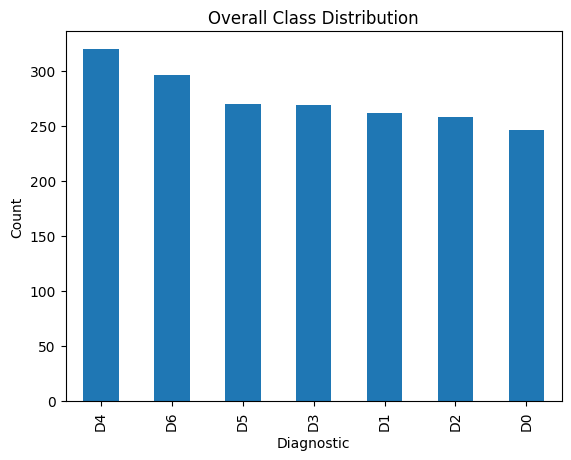

In [242]:
# Class distribution overall
class_counts = statistics_df['Diagnostic'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Diagnostic')
plt.ylabel('Count')
plt.title('Overall Class Distribution')
plt.show()


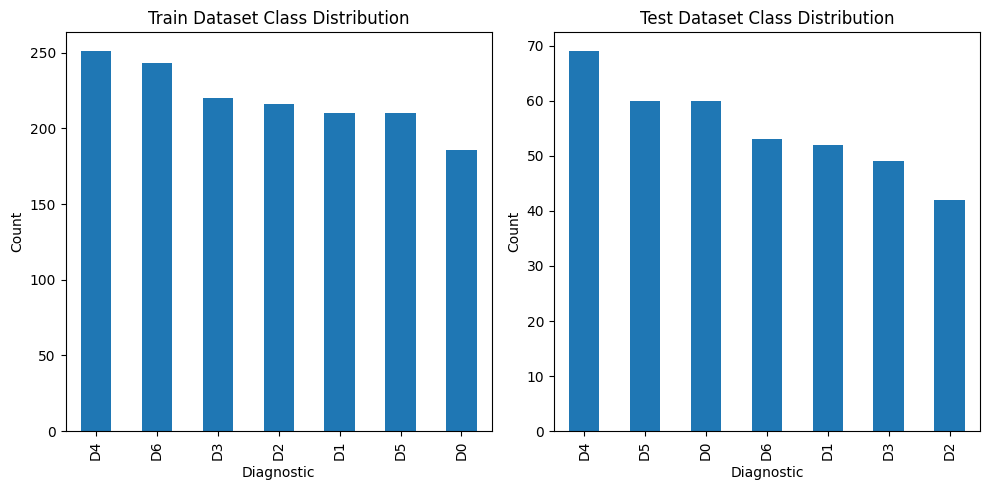

In [243]:
train_class_counts = train_df['Diagnostic'].value_counts()
test_class_counts = test_df['Diagnostic'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_class_counts.plot(kind='bar')
plt.xlabel('Diagnostic')
plt.ylabel('Count')
plt.title('Train Dataset Class Distribution')

plt.subplot(1, 2, 2)
test_class_counts.plot(kind='bar')
plt.xlabel('Diagnostic')
plt.ylabel('Count')
plt.title('Test Dataset Class Distribution')

plt.tight_layout()
plt.show()


In [244]:
import pandas as pd
import numpy as np
from scipy.stats import tmean, tstd, median_abs_deviation, iqr, tmin, tmax

# Identify numerical columns
numerical_columns = statistics_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize a dictionary to store the results
results = {}

# Calculate the required statistics for each numerical column
for col in numerical_columns:
    results[col] = {
        'Mean': tmean(statistics_df[col]),
        'Standard Deviation': tstd(statistics_df[col]),
        'Mean Absolute Deviation': np.mean(np.abs(statistics_df[col] - np.mean(statistics_df[col]))),
        'Min': tmin(statistics_df[col]),
        'Max': tmax(statistics_df[col]),
        'Difference between Min and Max': tmax(statistics_df[col]) - tmin(statistics_df[col]),
        'Median': np.median(statistics_df[col]),  # SciPy does not have a median function
        'Median Absolute Deviation': median_abs_deviation(statistics_df[col]),
        'Interquartile Range': iqr(statistics_df[col]),
    }

# Convert the results to a DataFrame
stats_df = pd.DataFrame(results).transpose()
stats_df


,Mean,Standard Deviation,Mean Absolute Deviation,Min,Max,Difference between Min and Max,Median,Median Absolute Deviation,Interquartile Range
Sedentary_hours_daily,3.693571,21.759835,1.133885,2.21,956.58,954.37,3.130000,0.440000,0.870000
Age,44.454971,633.322337,40.949876,15.00,19685.00,19670.00,22.000000,3.000000,7.000000
Est_avg_calorie_intake,2253.687663,434.075794,375.362344,1500.00,3000.00,1500.00,2253.000000,380.000000,757.000000
Height,3.573488,58.098160,3.738525,1.45,1915.00,1913.55,1.700000,0.070000,0.140000
Water_daily,2.010367,0.611034,0.470801,1.00,3.00,2.00,2.000000,0.444917,0.874479
Weight,205.637344,3225.653536,254.647671,-1.00,82628.00,82629.00,80.386078,24.386078,46.205365
Physical_activity_level,1.012640,0.855526,0.702160,0.00,3.00,3.00,1.000000,0.815768,1.567523


Index(['Transportation', 'Regular_fiber_diet', 'Diagnostic_in_family_history',
       'High_calorie_diet', 'Alcohol', 'Main_meals_daily', 'Snacks', 'Smoker',
       'Calorie_monitoring', 'Technology_time_use', 'Gender', 'Diagnostic'],
      dtype='object')
                              Unique Count
Transportation                           5
Regular_fiber_diet                       4
Diagnostic_in_family_history             2
High_calorie_diet                        2
Alcohol                                  4
Main_meals_daily                         4
Snacks                                   4
Smoker                                   2
Calorie_monitoring                       2
Technology_time_use                      4
Gender                                   2
Diagnostic                               7


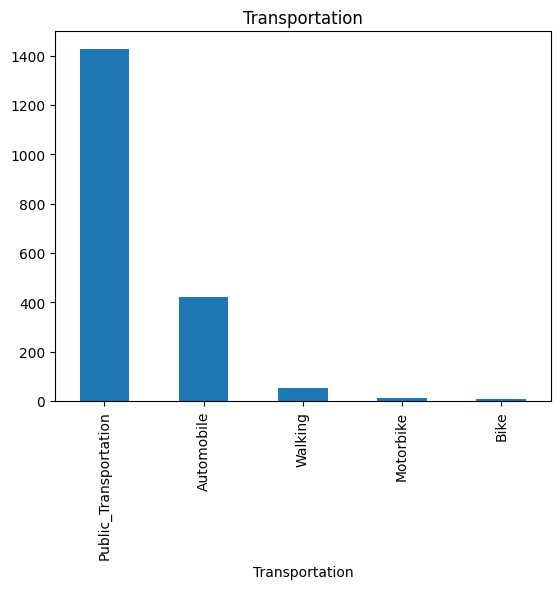

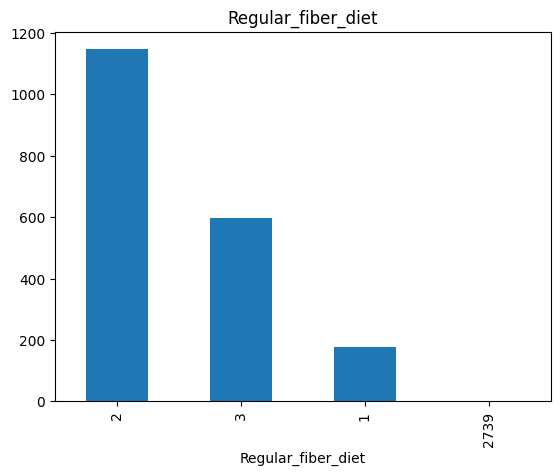

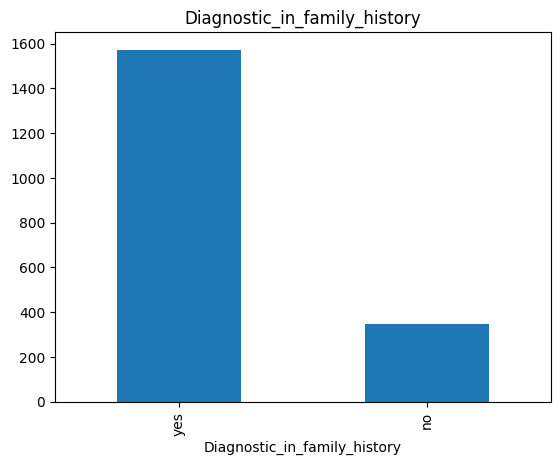

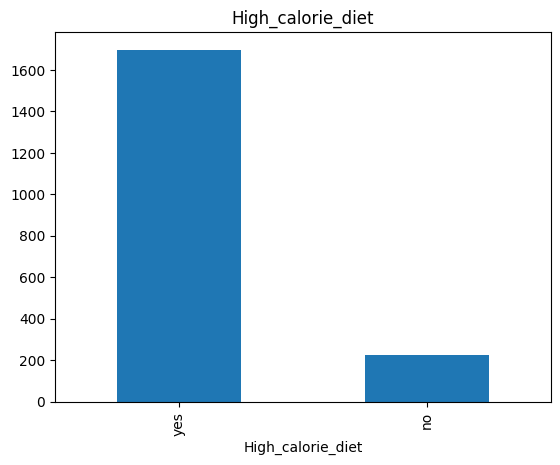

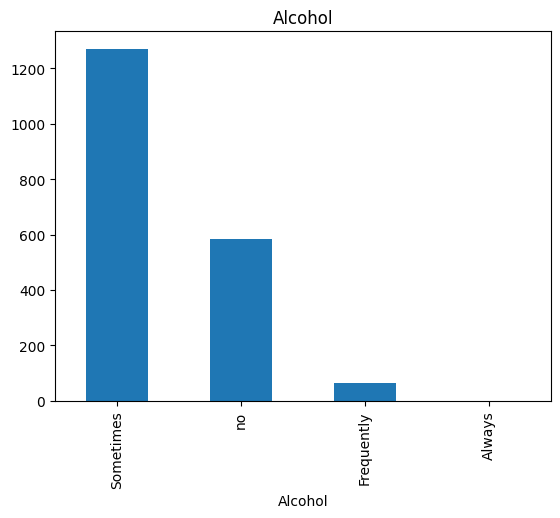

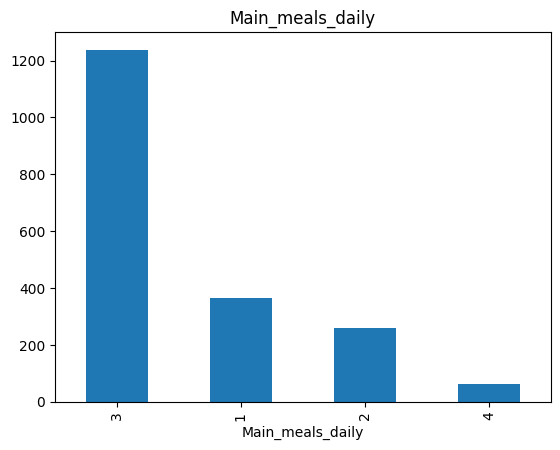

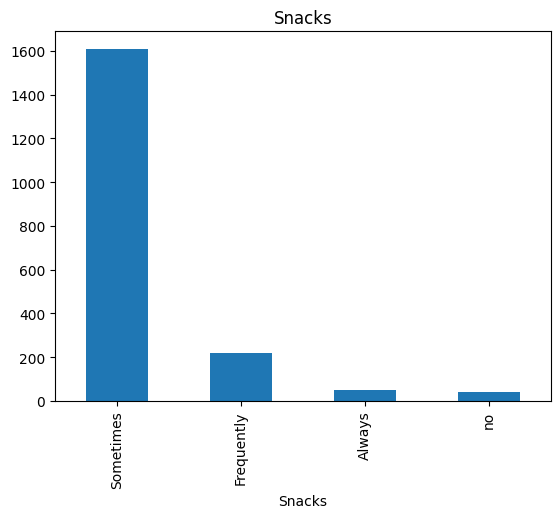

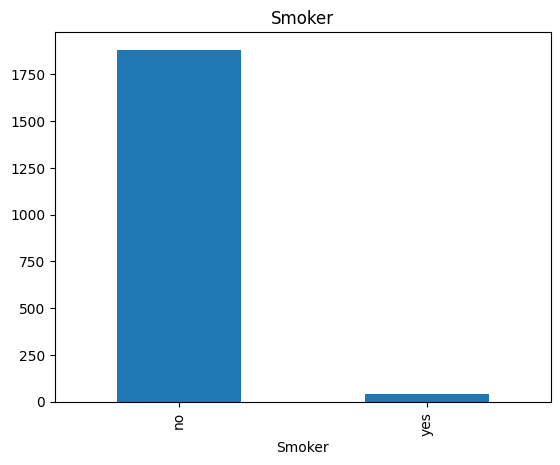

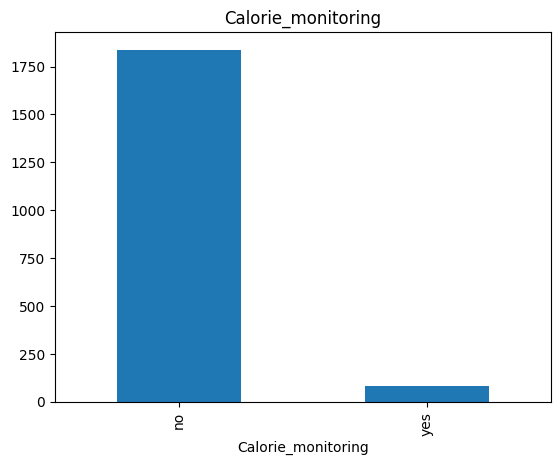

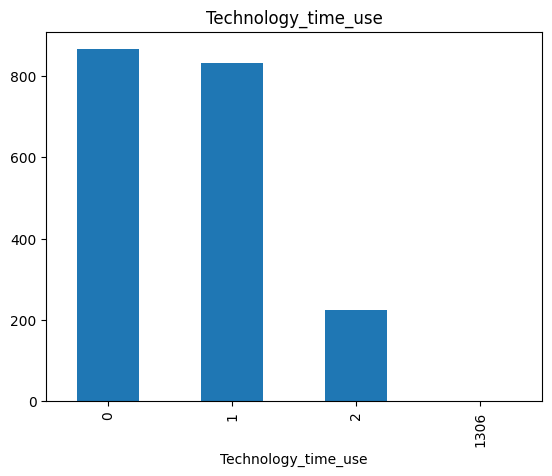

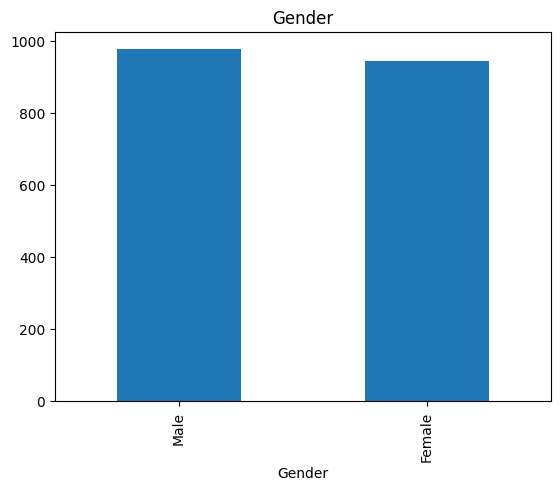

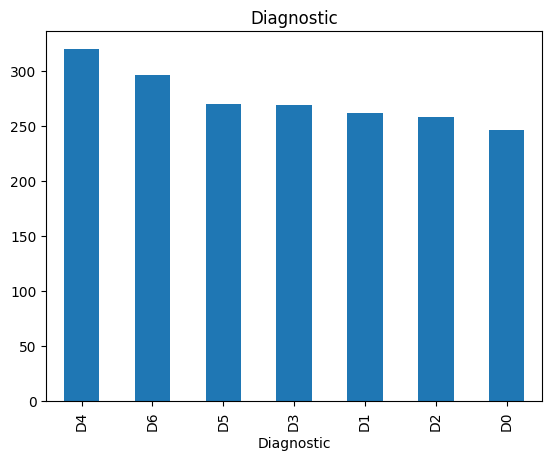

In [245]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify discrete, nominal or ordinal columns
categorical_columns = statistics_df.select_dtypes(include=['object', 'category', 'int8']).columns
print(categorical_columns)
# Initialize a dictionary to store the results
results = {}

# Calculate the count of unique values for each column
for col in categorical_columns:
    results[col] = statistics_df[col].nunique()

# Convert the results to a DataFrame
unique_counts_df = pd.DataFrame.from_dict(results, orient='index', columns=['Unique Count'])

# Display the DataFrame
print(unique_counts_df)

# Plot a histogram for each column
for col in categorical_columns:
    statistics_df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

In [246]:
import pandas as pd
from IPython.display import display

for column in statistics_df.columns:
    if statistics_df[column].dtype == 'object':
        statistics_df[column] = statistics_df[column].astype('category').cat.codes

cov_attributes = statistics_df.cov()
display(cov_attributes)


,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
Transportation,1.613173,0.088864,-0.048862,-0.029535,0.422834,8.382093,-0.015630,8.080411,-0.001890,-0.026046,1.200332,-0.001645,0.040653,0.008656,8.296457e+01,0.013698,0.146976,-0.087938,0.031402
Regular_fiber_diet,0.088864,0.356925,0.003358,-0.012392,-0.137983,-4.589061,-0.027903,-7.286559,0.069033,-0.027504,-0.415074,0.002715,0.037126,0.008733,-2.559261e+01,-0.003526,-0.035743,-0.096159,0.245788
Diagnostic_in_family_history,-0.048862,0.003358,0.148416,0.024699,0.094913,4.174651,0.006592,-6.864424,0.015612,0.031439,0.347992,0.000649,0.036532,-0.012481,2.777532e+01,-0.017956,0.006897,0.019265,0.385575
High_calorie_diet,-0.029535,-0.012392,0.024699,0.103063,0.071932,2.496830,-0.014435,2.786477,-0.005995,0.021901,0.223678,-0.002779,0.002342,-0.012147,1.686162e+01,-0.029297,0.013275,0.010898,0.154993
Sedentary_hours_daily,0.422834,-0.137983,0.094913,0.071932,473.490415,-12.924928,0.376236,273.718418,-0.735790,0.062952,-0.587676,-0.009673,-0.071017,-0.023988,1.916370e+01,-0.476095,1.494694,-0.252078,-0.637862
Age,8.382093,-4.589061,4.174651,2.496830,-12.924928,401097.182477,-5.632406,-84.411467,9.385148,3.126387,-34.975499,-0.338645,10.451026,-1.008210,-2.773142e+03,19.995552,-4.699622,10.209111,-19.515486
Alcohol,-0.015630,-0.027903,0.006592,-0.014435,0.376236,-5.632406,0.268677,-0.293501,-0.053053,-0.011072,-0.510293,-0.006128,-0.031022,-0.000697,4.909831e+01,0.036450,0.013008,0.002635,-0.154355
Est_avg_calorie_intake,8.080411,-7.286559,-6.864424,2.786477,273.718418,-84.411467,-0.293501,188421.795103,-4.490091,0.611156,-930.357530,-2.613285,-4.249024,-1.236498,-2.045723e+04,-1.738810,3.180425,-5.736378,-32.980618
Main_meals_daily,-0.001890,0.069033,0.015612,-0.005995,-0.735790,9.385148,-0.053053,-4.490091,0.692437,-0.045057,0.915565,0.004791,0.038445,0.002519,-2.121321e+01,0.086682,0.019951,0.011937,0.081474
Snacks,-0.026046,-0.027504,0.031439,0.021901,0.062952,3.126387,-0.011072,0.611156,-0.045057,0.217145,0.269326,-0.004320,0.043916,-0.010501,2.154517e+01,-0.010111,-0.013616,0.021538,0.301313


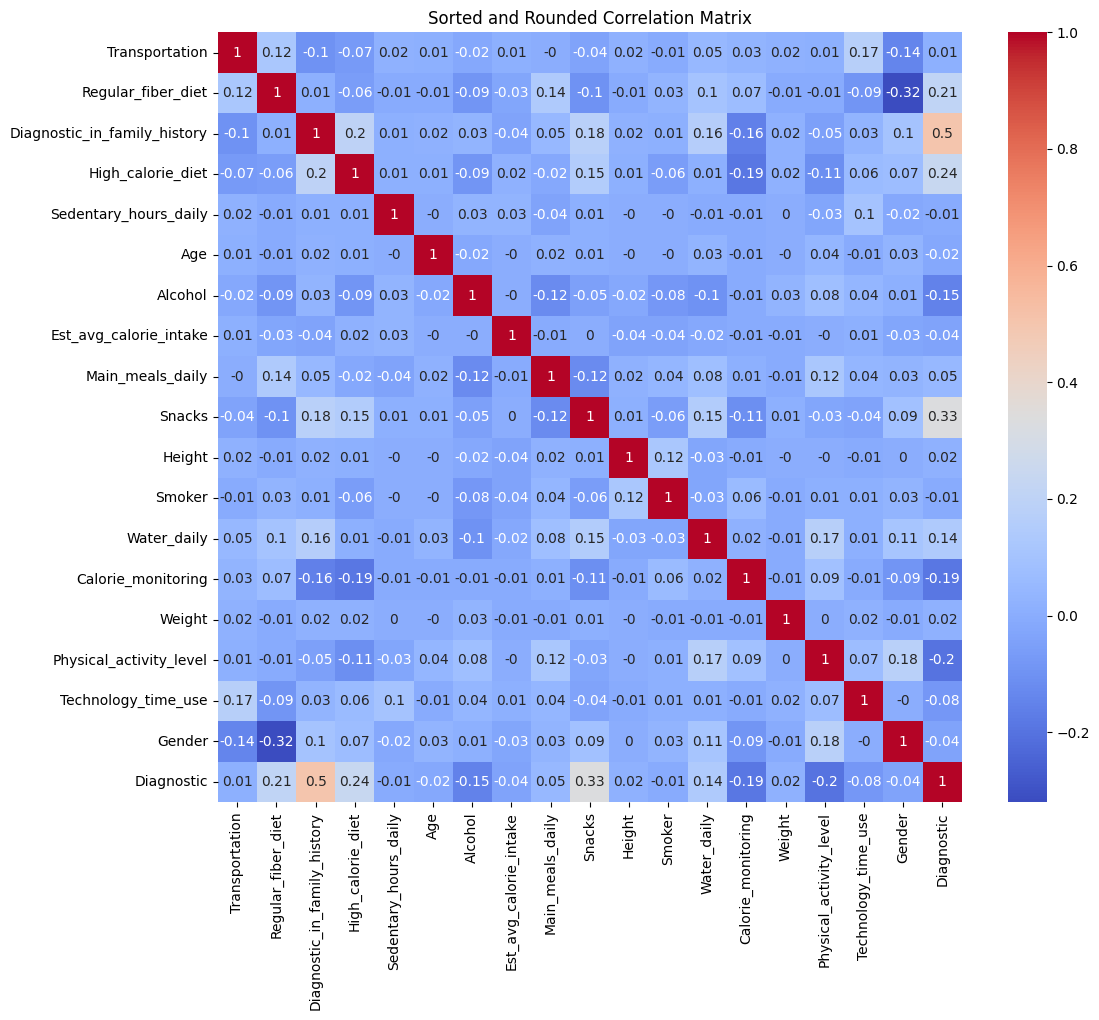

In [247]:
import seaborn as sns
correlation_matrix = statistics_df.corr()

# Round the values to a maximum of 3 decimals
rounded_corr_matrix = correlation_matrix.round(2)

# Create a heatmap of the sorted and rounded correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(rounded_corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Sorted and Rounded Correlation Matrix')

# Display the heatmap
plt.show()
plt.savefig(f"figs/correlation_matrix.png")


In [248]:
import ast
from sklearn.base import ClassifierMixin
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import (
    SelectPercentile,
    VarianceThreshold,
    chi2,
    f_classif,
)
from sklearn.model_selection import GridSearchCV

from matplotlib.backends.backend_pdf import PdfPages

def prepare_dataset():
    df = pd.read_csv("date_tema_1_iaut_2024.csv")
    prelucrate_data(df)
    # Replace -1 with NaN in the 'Weight' column
    df["Weight"] = df["Weight"].replace(-1, np.nan)

    # Initialize the IterativeImputer
    imputer = IterativeImputer()

    # Perform the imputation on the 'Weight' column
    df["Weight"] = imputer.fit_transform(df[["Weight"]])

    # Convert categorical columns to numerical
    le = LabelEncoder()
    for col in df.columns:
        df[col] = le.fit_transform(df[col])

    X = df.drop("Diagnostic", axis=1)
    y = df["Diagnostic"]

    # Create a VarianceThreshold object
    selector = VarianceThreshold(threshold=0.1)

    # Fit and transform the selector to the data
    features_before = X.columns
    X = pd.DataFrame(
        selector.fit_transform(X), columns=X.columns[selector.get_support()]
    )
    print(f"Features removed: {set(features_before) - set(X.columns)}")

    # Create a SelectPercentile object
    selector = SelectPercentile(f_classif, percentile=70)

    # Fit and transform the selector to the data
    features_before = X.columns
    X = pd.DataFrame(
        selector.fit_transform(X, y), columns=X.columns[selector.get_support()]
    )
    print(f"Features removed: {set(features_before) - set(X.columns)}")

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X, y)
    return X, y


def find_best_params(classifier, param_grid, X, y, random_state=42):

    # Create train test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    # Convert the custom scorer into a scorer that can be used with GridSearchCV

    scorers = {
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score, average="weighted"),
        "recall": make_scorer(recall_score, average="weighted"),
        "f1": make_scorer(f1_score, average="weighted"),
    }

    for scr in [accuracy_score, f1_score, precision_score, recall_score]:
        for class_label in np.unique(y):
            scorers[f"{scr.__name__}_D{class_label}"] = make_scorer(
                lambda y_true, y_pred, class_label: scr(
                    y_true == class_label, y_pred == class_label
                ),
                greater_is_better=True,
                class_label=class_label,
            )

    # Initialize a GridSearchCV
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=param_grid,
        cv=5,
        scoring=scorers,
        refit="f1",
        n_jobs=4,
    )
    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters
    print("Best parameters found: ", grid_search.best_params_)

    return grid_search, grid_search.best_params_

from IPython.display import display, Latex, HTML


def evaluate_my_model(
    model: ClassifierMixin, grid_search: GridSearchCV, X, y, random_state=42
):
    print(f"Model: {model.__class__.__name__}")
    # Create a DataFrame from cv_results_
    df = pd.DataFrame(grid_search.cv_results_)

    columns = [
        "params",
        "mean_test_accuracy",
        "std_test_accuracy",
        "mean_test_precision",
        "std_test_precision",
        "mean_test_recall",
        "std_test_recall",
        "mean_test_f1",
        "std_test_f1",
    ]
    for scr in [accuracy_score, f1_score, precision_score, recall_score]:
        for class_label in np.unique(y):
            columns.append(f"mean_test_{scr.__name__}_D{class_label}")
            columns.append(f"std_test_{scr.__name__}_D{class_label}")
    # Select the columns of interest
    df = df[columns]

    # Rename the columns
    df["params"] = df["params"].apply(lambda x: x.values())
    rename_params_to = ",".join([x for x in grid_search.best_params_])
    df = df.rename(columns={"params": rename_params_to})


    # Highlight the row with the best parameters

    dfs = []
    for class_label in np.unique(y):
        cols = [rename_params_to]
        for scr in [accuracy_score, f1_score, precision_score, recall_score]:
            cols.append(f"mean_test_{scr.__name__}_D{class_label}")
            cols.append(f"std_test_{scr.__name__}_D{class_label}")
        dfs.append(df[cols])
        renamed_cols = [rename_params_to]
        for scr in [accuracy_score, f1_score, precision_score, recall_score]:
            renamed_cols.append(f"{scr.__name__}_D{class_label}")
            renamed_cols.append(f"{scr.__name__}_D{class_label}_std")
        dfs[-1].columns = renamed_cols
        # display(dfs[-1])
        # fig, ax =plt.subplots(figsize=(12,4))
        # ax.axis('tight')
        # ax.axis('off')
        # the_table = ax.table(cellText=dfs[-1].values,colLabels=dfs[-1].columns,loc='center')

        # #https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
        # pp = PdfPages(f"foo{class_label}.pdf")
        # pp.savefig(fig, bbox_inches='tight')
        # pp.close()
        # print(dfs[-1].to_latex(
        #     index=False,  # To not include the DataFrame index as a column in the table
        #     # caption="Comparison of ML Model Performance Metrics",  # The caption to appear above the table in the LaTeX document
        #     # label="tab:model_comparison",  # A label used for referencing the table within the LaTeX document
        #     # position="htbp",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
        #     # column_format="|l|l|l|l|",  # The format of the columns: left-aligned with vertical lines between them
        #     # escape=False,  # Disable escaping LaTeX special characters in the DataFrame
        #     # float_format="{:0.4f}".format  # Formats floats to two decimal places
        #     ))

        if class_label == 6:
            # dfs[-1].style.set_table_styles([
            # {'selector': 'th', 'props': [('font-size', '10pt')]},
            # {'selector': 'td', 'props': [('font-size', '10pt')]}
            # ])
            # latex = dfs[-1].to_latex(index=False, float_format="{:0.4f}".format)
            # ltx = Latex(latex)
            html = dfs[-1].to_html(index=False)
            display(HTML(html))


    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    print(
        classification_report(
            y_test, y_pred, target_names=["D0", "D1", "D2", "D3", "D4", "D5", "D6"]
        )
    )

    # Confusion matrix
    def plot_confusion_matrix(cm, classes, model: RandomForestClassifier):
        df_cm = pd.DataFrame(cm, index=classes, columns=classes)
        plt.figure(figsize=(10,7))
        sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
        plt.savefig(f"figs/confusion_matrix_{model.__class__.__name__}.png")
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ["D0", "D1", "D2", "D3", "D4", "D5", "D6"], model)

    return accuracy, f1, precision, recall

In [249]:
# Initialize a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 25],
    'max_samples': [0.5, 0.7, 1.0],
}
X, y = prepare_dataset()
grid_search, best_params = find_best_params(clf, param_grid, X, y, RANDOM_STATE)

Features removed: {'Calorie_monitoring', 'Smoker'}
Features removed: {'Est_avg_calorie_intake', 'Physical_activity_level', 'Technology_time_use', 'Sedentary_hours_daily', 'Water_daily'}
Best parameters found:  {'max_depth': 20, 'max_samples': 1.0, 'n_estimators': 150}


"max_depth,max_samples,n_estimators",accuracy_score_D6,accuracy_score_D6_std,f1_score_D6,f1_score_D6_std,precision_score_D6,precision_score_D6_std,recall_score_D6,recall_score_D6_std
"(15, 0.5, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(15, 0.5, 150)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(15, 0.5, 200)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(15, 0.7, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(15, 0.7, 150)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(15, 0.7, 200)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(15, 1.0, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(15, 1.0, 150)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(15, 1.0, 200)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(20, 0.5, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163


              precision    recall  f1-score   support

          D0       0.96      0.80      0.87        60
          D1       0.75      0.88      0.81        52
          D2       0.86      0.86      0.86        42
          D3       0.88      0.90      0.89        49
          D4       0.94      0.86      0.89        69
          D5       0.91      0.98      0.94        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.89       385
   macro avg       0.89      0.89      0.89       385
weighted avg       0.90      0.89      0.89       385



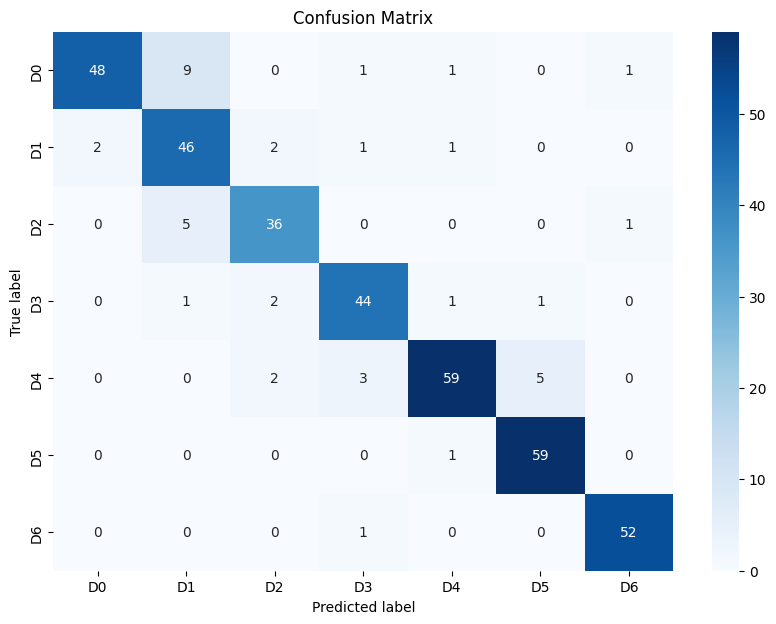

Accuracy: 0.8935064935064935
F1 Score: 0.8937436674764665
Precision: 0.8988330853810947
Recall: 0.8935064935064935
16


In [250]:
best_clf = RandomForestClassifier(**best_params, random_state=RANDOM_STATE)
accuracy, f1, precision, recall = evaluate_my_model(best_clf, grid_search, X, y, RANDOM_STATE)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(grid_search.best_index_)

In [251]:
# Initialize a RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf = ExtraTreesClassifier(random_state=RANDOM_STATE)


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 25],
    'max_samples': [0.5, 0.7, 1.0],
    'bootstrap': [True]
}
X, y = prepare_dataset()
grid_search, best_params = find_best_params(clf, param_grid, X, y, RANDOM_STATE)

Features removed: {'Calorie_monitoring', 'Smoker'}
Features removed: {'Est_avg_calorie_intake', 'Physical_activity_level', 'Technology_time_use', 'Sedentary_hours_daily', 'Water_daily'}
Best parameters found:  {'bootstrap': True, 'max_depth': 25, 'max_samples': 0.7, 'n_estimators': 200}


"bootstrap,max_depth,max_samples,n_estimators",accuracy_score_D6,accuracy_score_D6_std,f1_score_D6,f1_score_D6_std,precision_score_D6,precision_score_D6_std,recall_score_D6,recall_score_D6_std
"(True, 15, 0.5, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(True, 15, 0.5, 150)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(True, 15, 0.5, 200)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(True, 15, 0.7, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(True, 15, 0.7, 150)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(True, 15, 0.7, 200)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(True, 15, 1.0, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(True, 15, 1.0, 150)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(True, 15, 1.0, 200)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(True, 20, 0.5, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163


              precision    recall  f1-score   support

          D0       0.94      0.78      0.85        60
          D1       0.71      0.77      0.74        52
          D2       0.83      0.81      0.82        42
          D3       0.85      0.94      0.89        49
          D4       0.93      0.90      0.91        69
          D5       0.92      0.97      0.94        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.88       385
   macro avg       0.88      0.88      0.88       385
weighted avg       0.88      0.88      0.88       385



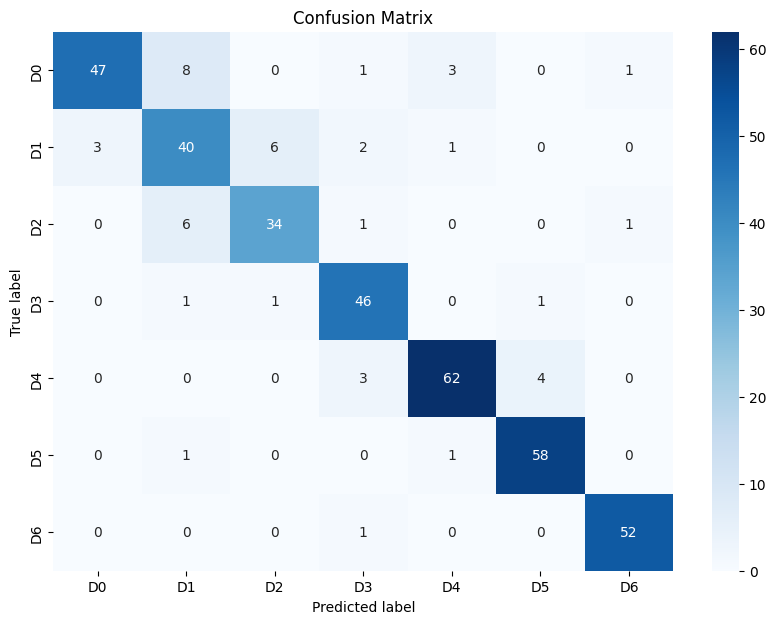

Accuracy: 0.8805194805194805
F1 Score: 0.8804649971113103
Precision: 0.8837369992729084
Recall: 0.8805194805194805


In [252]:
best_clf = ExtraTreesClassifier(**best_params, random_state=RANDOM_STATE)
accuracy, f1, precision, recall = evaluate_my_model(best_clf, grid_search, X, y, RANDOM_STATE)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

In [253]:
from xgboost import XGBClassifier

# Initialize a XGBClassifier
clf = XGBClassifier(random_state=RANDOM_STATE)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 25],
    'learning_rate': [0.01, 0.1, 0.2],
}

X, y = prepare_dataset()
grid_search, best_params = find_best_params(clf, param_grid, X, y, RANDOM_STATE)

Features removed: {'Calorie_monitoring', 'Smoker'}
Features removed: {'Est_avg_calorie_intake', 'Physical_activity_level', 'Technology_time_use', 'Sedentary_hours_daily', 'Water_daily'}
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 200}


"learning_rate,max_depth,n_estimators",accuracy_score_D6,accuracy_score_D6_std,f1_score_D6,f1_score_D6_std,precision_score_D6,precision_score_D6_std,recall_score_D6,recall_score_D6_std
"(0.01, 10, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.01, 10, 150)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.01, 10, 200)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.01, 15, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.01, 15, 150)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.01, 15, 200)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.01, 20, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.01, 20, 150)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.01, 20, 200)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.01, 25, 100)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163


              precision    recall  f1-score   support

          D0       0.92      0.82      0.87        60
          D1       0.88      0.83      0.85        52
          D2       0.87      0.93      0.90        42
          D3       0.92      0.94      0.93        49
          D4       0.88      0.87      0.88        69
          D5       0.92      0.95      0.93        60
          D6       0.91      1.00      0.95        53

    accuracy                           0.90       385
   macro avg       0.90      0.90      0.90       385
weighted avg       0.90      0.90      0.90       385



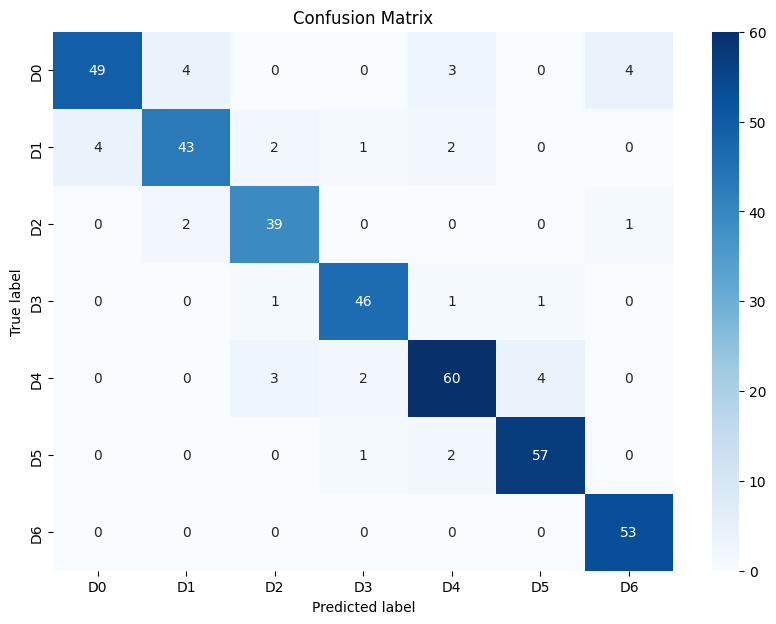

Accuracy: 0.9012987012987013
F1 Score: 0.9003098558168607
Precision: 0.9014520231712929
Recall: 0.9012987012987013


In [254]:
best_clf = XGBClassifier(**best_params, random_state=RANDOM_STATE)
accuracy, f1, precision, recall = evaluate_my_model(best_clf, grid_search, X, y, RANDOM_STATE)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

In [255]:
from sklearn.svm import SVC

# Initialize a SVC
clf = SVC(random_state=RANDOM_STATE)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

X, y = prepare_dataset()
grid_serach, best_params = find_best_params(clf, param_grid, X, y, RANDOM_STATE)


Features removed: {'Calorie_monitoring', 'Smoker'}
Features removed: {'Est_avg_calorie_intake', 'Physical_activity_level', 'Technology_time_use', 'Sedentary_hours_daily', 'Water_daily'}
Best parameters found:  {'C': 500, 'kernel': 'rbf'}


"C,kernel",accuracy_score_D6,accuracy_score_D6_std,f1_score_D6,f1_score_D6_std,precision_score_D6,precision_score_D6_std,recall_score_D6,recall_score_D6_std
"(0.1, linear)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.1, rbf)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.1, poly)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(0.1, sigmoid)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(1, linear)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(1, rbf)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(1, poly)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(1, sigmoid)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(10, linear)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163
"(10, rbf)",0.995918,0.008163,0.995918,0.008163,0.995918,0.008163,0.995918,0.008163


              precision    recall  f1-score   support

          D0       0.88      0.75      0.81        60
          D1       0.66      0.81      0.72        52
          D2       0.77      0.79      0.78        42
          D3       0.82      0.86      0.84        49
          D4       0.92      0.86      0.89        69
          D5       0.95      0.90      0.92        60
          D6       0.95      0.98      0.96        53

    accuracy                           0.85       385
   macro avg       0.85      0.85      0.85       385
weighted avg       0.86      0.85      0.85       385



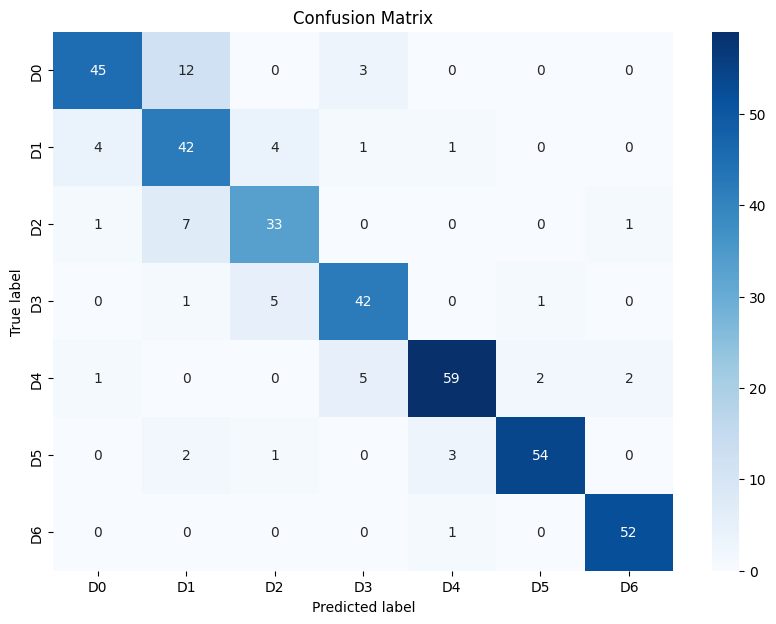

Accuracy: 0.8493506493506493
F1 Score: 0.8512085280591128
Precision: 0.8576941479450455
Recall: 0.8493506493506493


In [256]:
best_clf = SVC(**best_params, random_state=RANDOM_STATE)
accuracy, f1, precision, recall = evaluate_my_model(best_clf, grid_serach, X, y, RANDOM_STATE)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")